# Retail Data Analytics

## CRISP-DM Phase-1 Data Understanding Phase

Cross Industry Standard Process for Data Mining specifies that it is required for a Data Scientist to thoroughly understand the data available first, to find the outcome based on different modelling techniques. In this phase we acquire the data from its source and will load it into the work area. By looking at some of the statistical information about data, we will know the quality of the data available for analysis purposes.  

## Initial Exploratory Data Analysis

Goal of this project is to predict the sales of a Retail outlet based on the historical data provided for sales. A retailer wants to know the sales of his outlet in different locations across the country. This gives him a best understanding of scaling his business and to use the best practices which improves the sales of outlets. We have been given two kinds of data, one of them have historical data of sales across different outlets. For the other one we need to predict the sales based on the different parameters given. As we move through the various steps, we build a model to predict the sales of Retail Store.

In the first step we are going to acquire data into dataframes for further processing.

In [1]:
import numpy as np
import pandas as pd
data_Train = pd.read_csv("Train_Retail.csv")
data_Test = pd.read_csv("Test_Retail.csv")
data_Train['Source'] = 'train'
data_Test['Source'] = 'test'

In [2]:
data_Train.shape

(8523, 13)

In [3]:
data_Test.shape

(5681, 12)

In last few steps we loaded the data from Test and Train datasets into the data frames data_Test and data_Train respectively. Shape function gives us the shape i.e. number of rows and columns present in the dataframe. Train dataset has 8523 rows and 11 columns and data_Test has 5681 rows and 10 columns in it.

While predicting an outcome it is always important to understand our dataset properly and know the effecting features in the dataset. Let's have a look into the dataset given for training and test data. 

In [4]:
data_Train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          Regu

In [5]:
data_Test.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
5              FDH56        9.800          Regular         0.063817   
6              FDL48       19.350          Regular         0.082602   
7              FDC48          NaN          Low Fat         0.015782   
8              FDN33        6.305          Regular         0.123365   
9              FDA36        5.985          Low Fat         0.005698   
10             FDT44       16.600          Low Fat         0.103569   
11             FDQ56        6.590          Low Fat         0.105811   
12             NCC54          NaN          Low 

Head function gives us glimpse of data present in the Train and Test datasets. Although we can look at the data it is not so clear what are the different columns present in the dataset. By taking only one row of the dataset, lets examine the different columns. 

In [6]:
data_Train[:1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,train


With this it is clear that we have the columns named "Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier",
"Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales" in our training dataset. Of all these attributes all the columns in the starting are Predictors for the outcome "Item_Outlet_Sales".

Lets do the same for Test Dataset.

In [7]:
data_Test[:1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test


If we observe the attributes in the two datasets, we can observe that both test and train datasets have same type of columns except that in the test dataset Item_Outlet_Sales are missing, which we need to predict from the model we build from the train dataset. Now check for the datatypes of different columns in the dataset which will be helpful in further data processing operations. 

In [8]:
data_Train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

In [9]:
data_Test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Source                        object
dtype: object

We can see that our dataset has statistical values in them and also we have few of the categorical columns. Lets check for any of the missing data items in different attributes for our datasets.  

In [10]:
data_Train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In our training dataset we have the missing data values for the columns "Item_Weight" and "Outlet_Size" each of them having missing values for 1463 and 2410 number of rows. By checking the same for Test dataset. 

In [11]:
data_Test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Source                          0
dtype: int64

Our Test dataset also have missing values for "Item_Weight" and "Outlet_Size" columns. We are sure that our datasets have missing values in them. We need to deal with these missing values, leaving behind missing values have implications in building a successful model. Hence, it is often adviced to take the missing values into account and impute them properly. We shall deal with the missing values in our next section "Imputing the missing values". We have seen the attributes, datatypes and number of missing values. For better understanding the values in the dataset lets have a look into the statistics of our datasets.

In [12]:
data_Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Some Important Observations from the Statistics of Training dataset:

1. Column "Item_Weight" has values ranging from 4.56 to 21.35 with a mean value of 12.86 (adjusted to 2 decimal points). Count is showing as 7060 although we have 8523 number of rows in our training dataset. This phenomenon is justified by missing value count of 1463.
2. "Item_Visibility" has values ranging from 0 to 0.33 with a mean value of 0.066. But, min value of 0 is not practically feasible in this column. Since an Item can't be sold unless it is displayed in the shelves. We will change these values in our next sections.
3. "Item_MRP" has values ranging from 31.29 to 266.89 with a mean value of 141. 
4. "Outlet_Establishment_Year" has values ranging from 1985 to 2009. From this we can see that, first store started is in 1985 and the most recent store started in 2009.

Doing the same for our Test dataset. 

In [13]:
data_Test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## CRISP-DM Phase-2 Data Preparation:

Once we acquire data and verify some of the quality metrics on the given data, in the next phase of CRISP-DM Methodology we do prepare the data for applying Modelling techniques in the next phase. This step involves
i) Selecting the data required from the available input data
ii) Cleaning data - Imputing missing values or removing the records
iii) Construct data - This step involves deriving new records or changing the values of existing attributes in the data wherever is required
iv) Integrate data - Combining the different sources which adds value to the existing model
v) Format data - Syntactical modifications to the data to make as per the requirement of modelling algorithm/software used

In our Test dataset we have total of 5681 number of rows. Of these we have missing values for the attribute named Item_Weight. In our next steps we will deal with the missing values in the dataset. 

## Dealing with Missing values in the dataset

Having missing values in the dataset complicates the process of predicting the output and create a model that well performs. In order to deal with the missing values on the first hand we need to identify cause for missing item values in the dataset. Most of the times these data points are not recorded at the source or ignored while collecting the data. If the data points are collected and ignored while taking it into consideration it's often a good idea to re-enter those values from the source. If they were not collected at the source we need to find a way to impute those missing values.

 There are many ways to deal with the missing values based on the methodology we use. One easy way is to impute those missing values with the mean values of that attribute type. Although practically it is a very simple way to deal with the missing values, the result of this method are often not so accurate. For the current project I'm going to first impute the missing values with their mean value and design a model. Later we will design model itself to specifically identify the missing values. 

In order to avoid the duplication of process to treat the missing values separately in the Test and Train datasets, we are going to merge those two datasets and do the necessary operations.

In [14]:
data = pd.concat([data_Train,data_Test])

In [15]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [16]:
data.shape

(14204, 13)

In [17]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In the combined dataset we have around 14,204 number of rows. As seen in the previous sections, we have missing values for "Item_Weight". Let's impute these item weights by mean of the Item_Weights. 

In [18]:
data.mean()


Item_MRP                      141.004977
Item_Outlet_Sales            2181.288914
Item_Visibility                 0.065953
Item_Weight                    12.792854
Outlet_Establishment_Year    1997.830681
dtype: float64

In [19]:
data = data.fillna(data.mean())

In the previous steps we dealt with the missing values in the continuous variables. However, we have missing values in the categorical variable OutletSize. We are going to impute the missing values in the Outlet size with the mode of corresponding Outlet type. For categorical variables we replace the missing values with the mode values(most frequent occuring item in the set). In order to find the mode value for the categorical variables with small number of distinct values, we can code them to a float datatype column.

In [20]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In the code above we defined a function which decodes the categorical variables into appropriate decimal values.Applying the above function to outlet_size column in data frame 

In [21]:
data["Outlet_Size"] = coding(data["Outlet_Size"], {'Small':0,'Medium':1,'High':2})

In [22]:
data.head

<bound method NDFrame.head of      Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0             Low Fat           FDA15  249.8092        3735.138000   
1             Regular           DRC01   48.2692         443.422800   
2             Low Fat           FDN15  141.6180        2097.270000   
3             Regular           FDX07  182.0950         732.380000   
4             Low Fat           NCD19   53.8614         994.705200   
5             Regular           FDP36   51.4008         556.608800   
6             Regular           FDO10   57.6588         343.552800   
7             Low Fat           FDP10  107.7622        4022.763600   
8             Regular           FDH17   96.9726        1076.598600   
9             Regular           FDU28  187.8214        4710.535000   
10            Low Fat           FDY07   45.5402        1516.026600   
11            Regular           FDA03  144.1102        2187.153000   
12            Regular           FDX32  145.4786        1589.

In [23]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales               0
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [24]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [25]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
Source                       0
dtype: int64

In [26]:
print(data)

     Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0             Low Fat           FDA15  249.8092        3735.138000   
1             Regular           DRC01   48.2692         443.422800   
2             Low Fat           FDN15  141.6180        2097.270000   
3             Regular           FDX07  182.0950         732.380000   
4             Low Fat           NCD19   53.8614         994.705200   
5             Regular           FDP36   51.4008         556.608800   
6             Regular           FDO10   57.6588         343.552800   
7             Low Fat           FDP10  107.7622        4022.763600   
8             Regular           FDH17   96.9726        1076.598600   
9             Regular           FDU28  187.8214        4710.535000   
10            Low Fat           FDY07   45.5402        1516.026600   
11            Regular           FDA03  144.1102        2187.153000   
12            Regular           FDX32  145.4786        1589.264600   
13            Regula

## CRISP DM Phase-3 Data Construction

This phase invloves modifying the records to make them more meaningful for the analytical purposes. As we saw in the previous phases such as Item_Visibility, which are zero doesn't really make sense. A item can't be sold unless it is displayed in the store. Hence, it occupies some space on the display shelves. Let's modify it with the mean value so that it will be consistent with the other attributes. 

Item visibility depends on the store size. Hence I'm going to impute zero values with the appropriate store mean visibility values. 

In [27]:
#Find the avg visiblity by store
avg_visibility = data.pivot_table(values='Item_Visibility', index='Outlet_Identifier')

In [28]:
print(avg_visibility)

Outlet_Identifier
OUT010    0.101939
OUT013    0.060242
OUT017    0.061142
OUT018    0.059976
OUT019    0.107389
OUT027    0.060344
OUT035    0.060826
OUT045    0.060907
OUT046    0.060184
OUT049    0.059000
Name: Item_Visibility, dtype: float64


In [29]:
vis_zero_loc = (data['Item_Visibility'] == 0)
#Replace zero with mean value of visibility in that store
data.loc[vis_zero_loc,'Item_Visibility'] = data.loc[vis_zero_loc,'Outlet_Identifier'].apply(lambda x: avg_visibility[x])

Let's check the number of zero values in the output after imputing them with their store average values. 

In [30]:
sum(data['Item_Visibility'] == 0)

0

We successfully replaced the zero values in the Item Visibility with the mean values. 

#### Classify the items into broad categories - Creating a derived attribute

During this phase of Data Mining, we derive a new column based on the values present in the existing columns. Let's derive Item Category based on the Item_Identifier.

If we check the column Item_Identifier keenly we can observe that, Item_Identifier has a code prefixed in it based on the category which they belogns to. Broadly there are three categories of items each of which are identified by FD, DR and NC. Here I'm naming the derived column as Item_Category. 

In [31]:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x: x[0:2])
# To make it more intuitive give the elobarated description
#data['Item_Category'] = data['Item_Category'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [32]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,1.0,Supermarket Type1,train,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,1.0,Supermarket Type2,train,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,1.0,Supermarket Type1,train,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.101939,19.200000,1998,OUT010,Tier 3,1.0,Grocery Store,train,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.060242,8.930000,1987,OUT013,Tier 3,2.0,Supermarket Type1,train,NC
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.059976,10.395000,2009,OUT018,Tier 3,1.0,Supermarket Type2,train,FD
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,2.0,Supermarket Type1,train,FD
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,1.0,Supermarket Type3,train,FD
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,1.0,Supermarket Type1,train,FD
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,1.0,Supermarket Type1,train,FD


#### Modifying values in Item_Identifier column

If we study the various columns in the data frame we can observe that column Item_Fat_Content has values the following values.

In [33]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

We can see that column Item_Fat_Content has two different values indicating each amount of Fat Content such as Low Fat and LF for items with low value of Fat content. Similarly with the Regular and reg for regular fat content items.

In [34]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data.reset_index(level=0, inplace=True)
#Check if they are replaced properly
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Now we have two types of fat contents for all the items, however we know from the previous steps that we have non-consumable items. Having fat content for those items doesn't make sense. Let's create a new category for them. 

In [35]:
data.loc[data['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

Let's have a look at the data once

In [36]:
data.head(10)

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Category
0,0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,1.0,Supermarket Type1,train,FD
1,1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,1.0,Supermarket Type2,train,DR
2,2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,1.0,Supermarket Type1,train,FD
3,3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.101939,19.200000,1998,OUT010,Tier 3,1.0,Grocery Store,train,FD
4,4,Low Fat,NCD19,53.8614,994.7052,Household,0.060242,8.930000,1987,OUT013,Tier 3,2.0,Supermarket Type1,train,NC
5,5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.059976,10.395000,2009,OUT018,Tier 3,1.0,Supermarket Type2,train,FD
6,6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,2.0,Supermarket Type1,train,FD
7,7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,1.0,Supermarket Type3,train,FD
8,8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,1.0,Supermarket Type1,train,FD
9,9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,1.0,Supermarket Type1,train,FD


In [37]:
data

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Category
0,0,Low Fat,FDA15,249.8092,3735.138000,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,1.0,Supermarket Type1,train,FD
1,1,Regular,DRC01,48.2692,443.422800,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,1.0,Supermarket Type2,train,DR
2,2,Low Fat,FDN15,141.6180,2097.270000,Meat,0.016760,17.500000,1999,OUT049,Tier 1,1.0,Supermarket Type1,train,FD
3,3,Regular,FDX07,182.0950,732.380000,Fruits and Vegetables,0.101939,19.200000,1998,OUT010,Tier 3,1.0,Grocery Store,train,FD
4,4,Low Fat,NCD19,53.8614,994.705200,Household,0.060242,8.930000,1987,OUT013,Tier 3,2.0,Supermarket Type1,train,NC
5,5,Regular,FDP36,51.4008,556.608800,Baking Goods,0.059976,10.395000,2009,OUT018,Tier 3,1.0,Supermarket Type2,train,FD
6,6,Regular,FDO10,57.6588,343.552800,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,2.0,Supermarket Type1,train,FD
7,7,Low Fat,FDP10,107.7622,4022.763600,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,1.0,Supermarket Type3,train,FD
8,8,Regular,FDH17,96.9726,1076.598600,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,1.0,Supermarket Type1,train,FD
9,9,Regular,FDU28,187.8214,4710.535000,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,1.0,Supermarket Type1,train,FD


For model building with Sci-kit learn we need to have the variables as numerical values. However,we have few variables with the text columns. To convert them to numerical values sci-kit module provides a LabelEncoder from it's pre processing module.

In [38]:
#From sklearn pre-processing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#creating another variable for outlet
data['Outlet'] = label_encoder.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Category','Outlet_Type','Outlet']
label_encoder = LabelEncoder()
for i in var_mod:
    data[i] = label_encoder.fit_transform(data[i])

In [39]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Category','Outlet'])

In [40]:
data.dtypes

index                          int64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Category_0                uint8
Item_Category_1                uint8
Item_Category_2                uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

# CRISP-DM Phase-4 Creating Data Models

In this step we are going to create data models that are capable of predicting the Outlet_Sales. Inorder to create these models first we split the given dataset into Train and Test datasets. Train dataset is the one which have the ItemOutlet_Sales values. We will train the model based on these values to predict the test dataset values.


In this first we are going to create a basic Linear Regression model. Let's split the dataset into Test and Train Datasets. We already know that 8523 rows in Train dataset and rest of the rows are from Test dataset.

In [41]:
data_train=data[0:8522]
data_test=data[8523:]

In [42]:
data_train

,index,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Source,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,train,...,0,0,0,0,0,0,0,0,0,1
1,1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,train,...,0,0,0,1,0,0,0,0,0,0
2,2,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,train,...,0,0,0,0,0,0,0,0,0,1
3,3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.101939,19.200000,1998,OUT010,train,...,1,0,0,0,0,0,0,0,0,0
4,4,NCD19,53.8614,994.7052,Household,0.060242,8.930000,1987,OUT013,train,...,0,1,0,0,0,0,0,0,0,0
5,5,FDP36,51.4008,556.6088,Baking Goods,0.059976,10.395000,2009,OUT018,train,...,0,0,0,1,0,0,0,0,0,0
6,6,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,train,...,0,1,0,0,0,0,0,0,0,0
7,7,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,train,...,0,0,0,0,0,1,0,0,0,0
8,8,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,train,...,0,0,0,0,0,0,0,1,0,0
9,9,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,train,...,0,0,1,0,0,0,0,0,0,0


In [43]:
data_test

,index,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Source,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,0,FDW58,107.8622,2181.288914,Snack Foods,0.007565,20.750000,1999,OUT049,test,...,0,0,0,0,0,0,0,0,0,1
8524,1,FDW14,87.3198,2181.288914,Dairy,0.038428,8.300000,2007,OUT017,test,...,0,0,1,0,0,0,0,0,0,0
8525,2,NCN55,241.7538,2181.288914,Others,0.099575,14.600000,1998,OUT010,test,...,1,0,0,0,0,0,0,0,0,0
8526,3,FDQ58,155.0340,2181.288914,Snack Foods,0.015388,7.315000,2007,OUT017,test,...,0,0,1,0,0,0,0,0,0,0
8527,4,FDY38,234.2300,2181.288914,Dairy,0.118599,12.792854,1985,OUT027,test,...,0,0,0,0,0,1,0,0,0,0
8528,5,FDH56,117.1492,2181.288914,Fruits and Vegetables,0.063817,9.800000,1997,OUT046,test,...,0,0,0,0,0,0,0,0,1,0
8529,6,FDL48,50.1034,2181.288914,Baking Goods,0.082602,19.350000,2009,OUT018,test,...,0,0,0,1,0,0,0,0,0,0
8530,7,FDC48,81.0592,2181.288914,Baking Goods,0.015782,12.792854,1985,OUT027,test,...,0,0,0,0,0,1,0,0,0,0
8531,8,FDN33,95.7436,2181.288914,Snack Foods,0.123365,6.305000,2002,OUT045,test,...,0,0,0,0,0,0,0,1,0,0
8532,9,FDA36,186.8924,2181.288914,Baking Goods,0.005698,5.985000,2007,OUT017,test,...,0,0,1,0,0,0,0,0,0,0


Entire dataset has been splitted into Train and Test datasets data_train and data_test respectively. As a first model in creating data models for predicting Item_Outlet_Sales values, I'm going to create a linear regression model.

# Linear Regression Model:

As the first model in the Data Modelling phase I would like to create a model based on the linear regression. Regression analysis is the art and science of fitting straight lines to patterns of data. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.  

### Simple Linear Regression Model

In a simple linear regression model, we attempt to find the relation between two variables where one variable is known as response/dependent variable while the other is considered as a predictor. We will build a model, as an analysis such that unit change in the predictor causes how much variation in the dependent variable. 
Simplest form of the linear regression can be explained by a mathematical equation
Y = a + bX,
Where X is the explanatory variable and Y is the dependent variable. The slope of the fitting line is explained by “b”, while the a is the co-efficient of the fitting line. 

### Multiple Linear Regression Model

In a simpler form of the linear regression model, we will be analyzing the Y value as variation in change of X value. However, in real-life scenarios we can’t simply determine the Y value based on a single variable X. There are other predictors which tends to affect the Y value. In those of kind of situations, creating a simple linear relationship doesn’t give us the accurate results. To analyze those kinds of scenarios we use a model called multiple linear regression model. Mathematically we represent this with the equation 
Y = a + b0X0+b1X1+b2X2+ ….. + bnXn  + ε
Where b0, b1,b2 … bn are the co-efficient of  X0, X1, X2, … Xn. a is the intercept of the line while, ε is the constant error. 
In the above equation X0, X1, X2, … Xn are the estimators which collectively determines the value of Y. 
Assumptions we made in this equation:
1.	If Xi changes by an amount ∆Xi, holding other variables fixed, then the expected value of Y changes by a proportional amount bi∆Xi, for some constant bi (which in general could be a positive or negative number).
2.	The value of bi is always same regardless of other values of Xi. 
3.	The total effect of X’s on the expected value of Y is the sum of squares of their individual effects. 
The art of regression modeling is to collect data that is relevant and informative with respect to your decision or inference problem, and then define your variables and construct your model in such a way that the assumptions listed above are plausible, at least as a first-order approximation to what is happening.


### Evaluation of Performance - Regression Model:

One of the most frequently used metric for evaluation of model performance of Linear regression model is to determine the value of Root Mean Square Error. The regression line predicts the average y value associated with a given x value. Note that is also necessary to get a measure of the spread of the y values around that average. To do this, we use the root-mean-square error (r.m.s. error).
To construct the r.m.s. error, you first need to determine the residuals. Residuals are the difference between the actual values and the predicted values. I denoted them by  , where  is the observed value for the ith observation and   is the predicted value.
They can be positive or negative as the predicted value under or over estimates the actual value. Squaring the residuals, averaging the squares, and taking the square root gives us the r.m.s error. You then use the r.m.s. error as a measure of the spread of the y values about the predicted y value.

On applying this model to our dataset:

In [44]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier','Source','Item_Type']
from sklearn import cross_validation, metrics
from sklearn.linear_model import LinearRegression
predictors = [x for x in data_train.columns if x not in [target]+IDcol]
model = LinearRegression(normalize=True)
model.fit(data_train[predictors],data_train[target])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Plotting the co-efficients of our prediction model

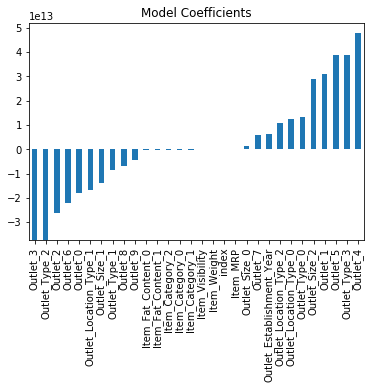

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
coef1 = pd.Series(model.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

We can check the values of Co-efficients as 

In [46]:
coef1

Outlet_3                    -3.754314e+13
Outlet_Type_2               -3.732963e+13
Outlet_2                    -2.610650e+13
Outlet_6                    -2.224114e+13
Outlet_0                    -1.814627e+13
Outlet_Location_Type_1      -1.678538e+13
Outlet_Size_1               -1.373099e+13
Outlet_Type_1               -8.482988e+12
Outlet_8                    -6.840773e+12
Outlet_9                    -4.334977e+12
Item_Fat_Content_0          -4.470400e+11
Item_Fat_Content_1          -4.470400e+11
Item_Category_2             -3.184049e+11
Item_Category_0             -3.184049e+11
Item_Category_1             -3.184049e+11
Item_Visibility             -2.304633e+02
Item_Weight                 -5.797089e-01
index                       -8.253445e-05
Item_MRP                     1.555548e+01
Outlet_Size_0                1.517121e+12
Outlet_7                     5.749288e+12
Outlet_Establishment_Year    6.371157e+12
Outlet_Location_Type_2       1.075560e+13
Outlet_Location_Type_0       1.241

#### Intuition from the Co-efficient values:

After looking at the values of Co-efficients, we can see that
1. Each item Sales largely depends upon the Store in which we are selling it. 
2. Location of the outlet influences most of the Item Sales. 

We should clearly keep in mind that all these variables are inter-connected. We can't really identify how much an individual variable effects the Item_Outlet_Sales. Instead we assume that by keeping all the remaining variables fixed, how much a unit change in one variable effects overall Item_Outlet_Sales. 

In [47]:
data_train_predictions = model.predict(data_train[predictors]) 

In [48]:
pd.DataFrame(data_train_predictions,columns=['Predicted_Item_Outlet_Sales'])

,Predicted_Item_Outlet_Sales
0,4056.0
1,572.0
2,2368.0
3,1012.0
4,902.0
5,624.0
6,1040.0
7,3168.0
8,1550.0
9,3114.0


In [49]:
data_train['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8492    2419.5172
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     8

In [50]:
df = pd.DataFrame({'Actual':data_train['Item_Outlet_Sales'],'Predicted':data_train_predictions})
df['Prediction_Error'] = df['Actual']-df['Predicted']
df

,Actual,Predicted,Prediction_Error
0,3735.1380,4056.0,-320.8620
1,443.4228,572.0,-128.5772
2,2097.2700,2368.0,-270.7300
3,732.3800,1012.0,-279.6200
4,994.7052,902.0,92.7052
5,556.6088,624.0,-67.3912
6,343.5528,1040.0,-696.4472
7,4022.7636,3168.0,854.7636
8,1076.5986,1550.0,-473.4014
9,4710.5350,3114.0,1596.5350


We will evaluate the model performance with the RMSE value for the  model. Let's find the RMSE for linear regression model we built

In [51]:
results_cv = pd.DataFrame(data_train_predictions,data_train['Item_Outlet_Sales'])
print("RMSE:",(np.sqrt(metrics.mean_squared_error(data_train[target].values, data_train_predictions))))

RMSE: 1127.46429584


So far we trained and evaluated our model on the train data. Once we evaluate the performance of the model, next step is to  predict the values of Item_Outlet_Sales by appyling our model to the the test Data.

In [52]:
data_test_predictions = model.predict(data_test[predictors]) 

In [53]:
data_test_predictions

array([ 1842.,  1570.,  1874., ...,  1808.,  3540.,  1266.])

### Decision Tree Regression Model

In the previous section we have dealt with a linear regression model that usually works well with the numerical predictions. Having said that, we have many other models that can better predict the numerical values. One such model here is using a Decision tree model. Decision tree models are often used in the classification. However, they are good at predicting the continuous output variable. Decision tree models are so simple to understand. We can visualize the conditions used to arrive at the conclusion in a simple if-else ladder. This makes it more attractive in machine learning applications that don't need a complex understanding of statistical formulae in arriving at a conclusion/decision. 

Let's apply the Decision tree regressor model to our Retail Data Analytics data. First fit the model using the train data we have already. Later we will be using this model to predict Item_Outlet_Sales for our test data. 

In [54]:
from sklearn.tree import DecisionTreeRegressor
DT_Model = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
DT_Model.fit(data_train[predictors],data_train[target])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

We created a model that best fits our train data. A way to visualize the Decision tree model is to use graphviz. I'm going to write the conditions onto a text file and later copy those data into graphviz website which then gives me a Decision Tree in pictorial representation.

In [55]:
from sklearn import tree
with open("DT_Model.txt", "w") as f:
    f = tree.export_graphviz(DT_Model, out_file=f)

<img src="Decision_Tree.jpg">

Although we can see that we arrived at a decision based on different conditions from above pictures, but we don't actually know the features used at each branch of decision making.From the model we can know the feature importances by applying the code below 

In [56]:
Feature_Imp = pd.Series(DT_Model.feature_importances_, predictors).sort_values(ascending=False)

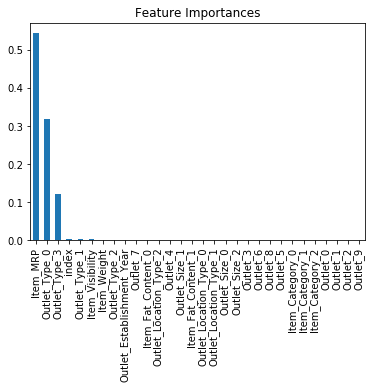

In [57]:
Feature_Imp.plot(kind='bar', title='Feature Importances')

From the above bar graph it is clearly evident that there are only 4 predaminant features that are used in decision tree model. 
Most used features in the order of their importance are
1. Item_MRP
2. Outlet_Type_0
3. Outlet_Type_3
4. Outlet_Establishment_Year

We can validate our model by knowing the performance of our model for our train data. After calculating the Item_Outlet_Sales for our training data and knowing the deviance from the actual values by calculating RMSE value like we did in our Linear Regression Model, it gives us a Level playing field to compare both of our models. 

Let's predict the values for our training data using DT_Model

In [58]:
y_train_predict = DT_Model.predict(data_train[predictors])
y_train_predict

array([ 4129.65055304,   699.7819098 ,  2309.200798  , ...,  1879.05405   ,
        1285.9048144 ,  1372.68849074])

With the Predicted Item Outlet Sale values in hand let's calculate the RMSE value for our DT_Model

In [59]:
print("RMSE:",(np.sqrt(metrics.mean_squared_error(data_train[target].values, y_train_predict))))

RMSE: 1058.45215103


We have a value of 1058 (rounded) for RMSE for our Decision Tree Regression model. 

So far we're following the Cross Industry Standard Platform for Data Mining Methodology in this project. We have gone through different phases of this methodology to predict the Item_Outlet_Sales for given test data. In the next phase of our DM Methodology we need to evaluate the models that we built so far. 

## CRISP DM Phase-5  Model Evaluation

In this phase of the project we're going to evaluate the models that we've built so far based on the common industry standard benchmarks for different models. One such model here we used is RMSE. Regardless of the models we built RMSE is a common metric that evaluates the correctness of the model. It is Root Mean Square of all the deviations of predicted values from actual values in the test data. 

In the previous phase we calculated the RMSE value for both of models built for this project. We have the RMSE values 1127 and 1058 for our Linear Regression and Decision Tree Regression Model respectively. With the slightest understanding we can identify that Decision Tree Regressor model performed well compared to the Multi-Value Linear Regression Model. Hence, we are going to use Decision Tree Regressor model to predict the Item_Outlet_Sales values for our Test Data. Let's do the prediction using Decision Tree Regressor model.

In [60]:
 y_test_predict = DT_Model.predict(data_test[predictors])

In [61]:
y_test_predict

array([ 1661.69319608,  1412.15620504,   584.75776477, ...,  1827.83284545,
        3670.05265306,  1285.9048144 ])

In the above step we predicted values for our test dataset. Let's glue these Item_Outlet_Sales values to our test dataset and create a csv file for further understanding of how different stores are performing using a dashboard tool. 

Let's export this data and create a dashboard to analyze the Item_Outlet_Sales in the Retail Chain. 

In [62]:
data_Test['Item_Outlet_Sales']=y_test_predict
Retail_Data = pd.concat([data_Train,data_Test])

In [63]:
data_Test.to_csv("C:\Capstone Project\Retail_Data_Output_File.csv")
Retail_Data.to_csv("C:\Capstone Project\Retail_Data.csv")

Created following dashboard using Microsoft Power BI Desktop tool. 

<img src="RETAILDATAANALYTICS.jpg">